In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import random
from random import choice
import pylab as plt
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\alex\\Desktop\\Project 9- Virtual world Data Analysis\\dataverse_files\\csv")

In [3]:
y=pd.read_csv('campaigns.csv',sep=";",nrows=3978,engine='python',names=[0,1,2,3],usecols=(0,1,2,3))

In [4]:
y=y[1444:3978]

In [5]:
G=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True,create_using=nx.DiGraph())

In [6]:
G1=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True) 

In [7]:
G1.order()

2505

In [8]:
#G1.nodes()

In [9]:
Time=[]
Time.append(y.loc[(y[1]>='2010-10-31 13:53:00')&(y[1]<='2010-11-01 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-01 15:04:00')&(y[1]<='2010-11-02 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-02 15:04:00')&(y[1]<='2010-11-03 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-03 15:04:00')&(y[1]<='2010-11-04 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-04 15:04:00')&(y[1]<='2010-11-05 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-05 15:04:00')&(y[1]<='2010-11-06 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-06 15:04:00')&(y[1]<='2010-11-07 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-07 15:04:00')&(y[1]<='2010-11-08 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-08 15:04:00')&(y[1]<='2010-11-09 15:04:00')])
Time.append(y.loc[(y[1]>'2010-11-09 15:04:00')&(y[1]<='2010-11-10 18:40:00')])

In [10]:
X=[]
for i in range(10):
    X.append(nx.from_pandas_dataframe(Time[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 

In [11]:
X1=[]
for i in range(10):
    X1.append(nx.from_pandas_dataframe(Time[i],2,3))

In [12]:
for i in range(10):
    print(X[i].order(),X[i].size())

1948 1977
247 181
111 70
55 32
82 54
102 70
66 44
68 49
31 19
60 38


In [13]:
Y=[]
for node in G:
    d = G.out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:100]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers who were most active in campaign 2: ")
print(L)

[[18056, 89], [18490, 84], [18201, 72], [17900, 71], [17884, 66], [17897, 58], [18026, 53], [18900, 47], [18948, 45], [18323, 40], [17954, 38], [18702, 35], [17880, 32], [17887, 32], [18007, 30], [19001, 30], [18039, 29], [18335, 28], [17883, 27], [18125, 27], [17885, 26], [18860, 26], [17961, 25], [18600, 25], [19230, 25], [19697, 25], [17977, 24], [18652, 24], [18144, 23], [18178, 23], [17974, 22], [17902, 21], [19778, 21], [18728, 20], [17992, 19], [18300, 19], [18864, 19], [17894, 18], [17991, 18], [18147, 18], [18187, 18], [18890, 18], [18703, 17], [17910, 16], [18372, 16], [18434, 16], [18051, 15], [18259, 15], [18038, 14], [18325, 13], [18601, 13], [18019, 12], [18456, 12], [18797, 12], [18827, 12], [18866, 12], [18647, 11], [19094, 11], [18002, 10], [18066, 10], [18151, 10], [18165, 10], [18436, 10], [18678, 10], [19289, 10], [19781, 10], [20101, 10], [17879, 9], [17886, 9], [17930, 9], [18102, 9], [18246, 9], [18452, 9], [18562, 9], [18836, 9], [18881, 9], [19023, 9], [17898, 

In [14]:
F=[]
for i in range(10):
    Y=[] 
    for node in X[i]: 
        d = X[i].degree(node)
        Y.append([node,d])
    F.append(Y)

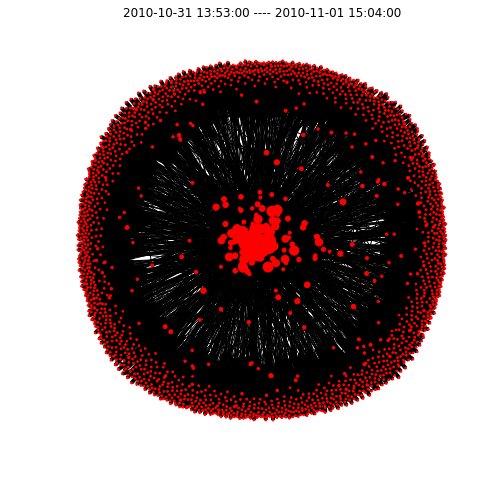

Number of nodes in graph: 1948
Diameter: 18
Radius: 9


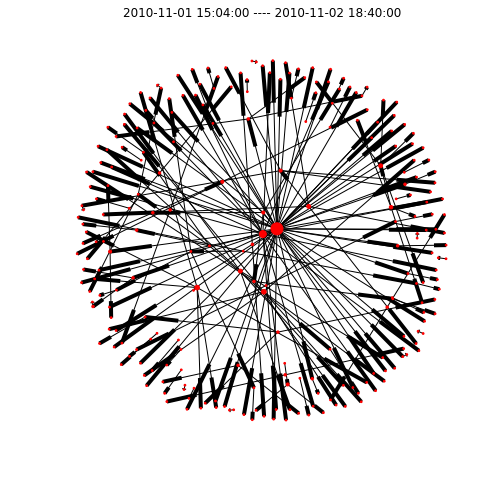

Number of nodes in graph: 247
Diameter: 4
Radius: 2


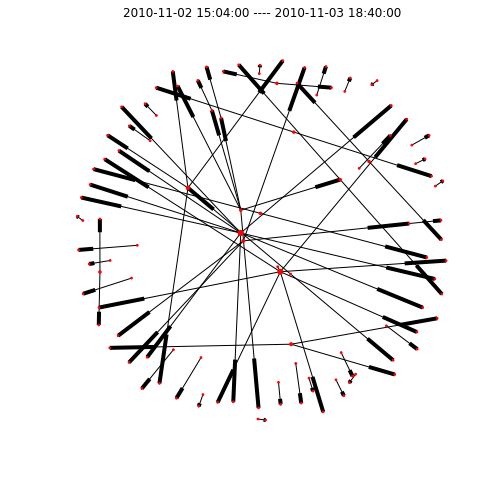

Number of nodes in graph: 111
Diameter: 2
Radius: 1


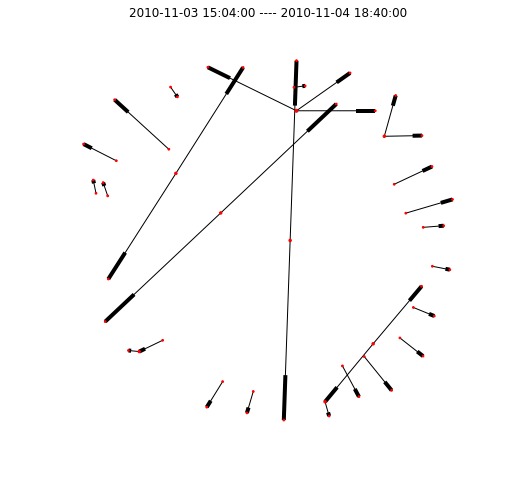

Number of nodes in graph: 55
Diameter: 2
Radius: 1


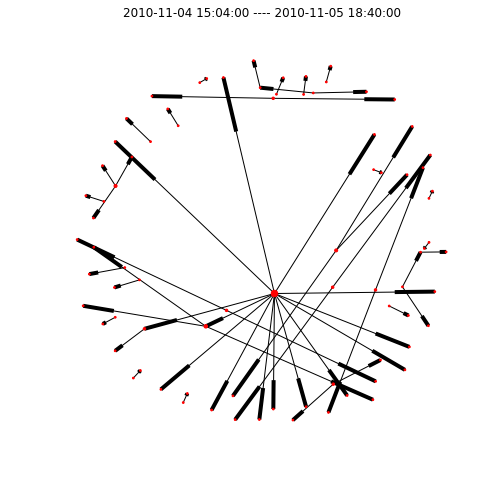

Number of nodes in graph: 82
Diameter: 4
Radius: 2


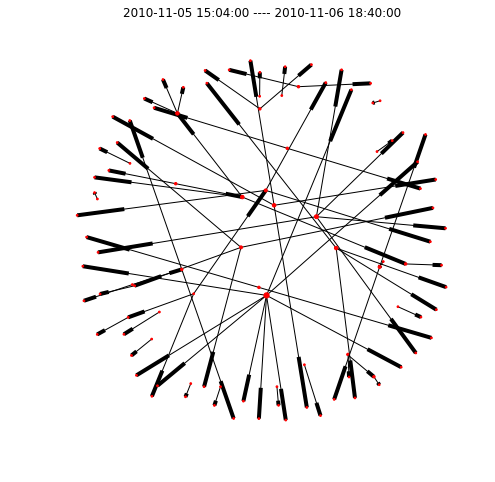

Number of nodes in graph: 102
Diameter: 4
Radius: 2


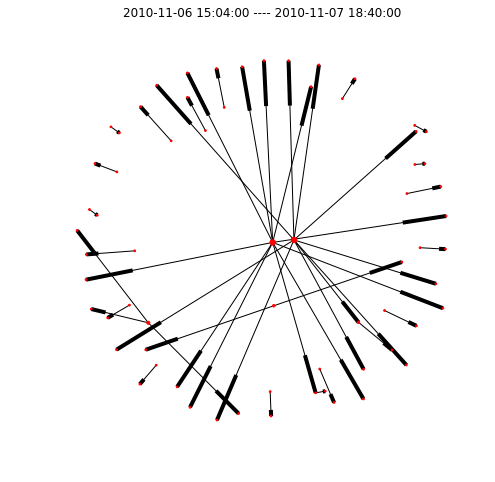

Number of nodes in graph: 66
Diameter: 3
Radius: 2


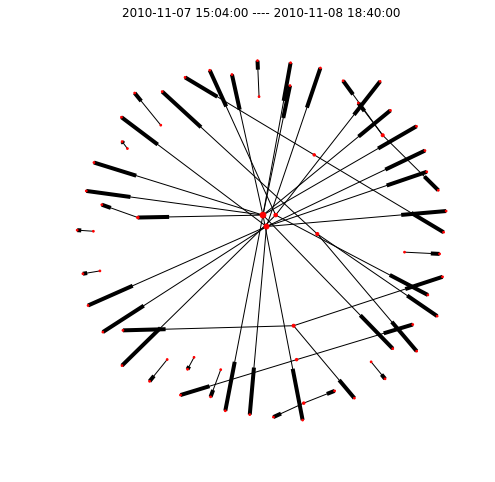

Number of nodes in graph: 68
Diameter: 3
Radius: 2


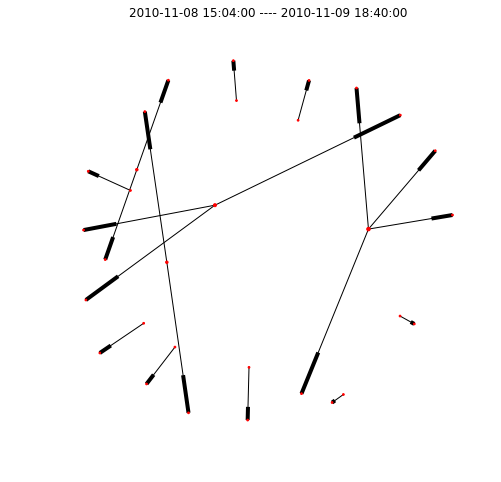

Number of nodes in graph: 31
Diameter: 2
Radius: 1


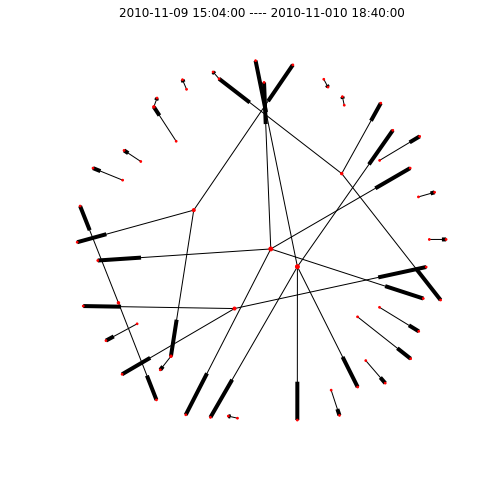

Number of nodes in graph: 60
Diameter: 2
Radius: 1


In [15]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G.subgraph(X[i])
    deg=nx.degree(V)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(8,8)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    #nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
    if(i==0):
        plt.title('2010-10-31 13:53:00 ---- 2010-11-01 15:04:00')
    else:
        plt.title('2010-11-0'+str(i)+' 15:04:00 ---- 2010-11-0'+str(i+1)+' 18:40:00')
    plt.axis('off')
    plt.show()
    print("Number of nodes in graph: %d" %V.order())
    S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])

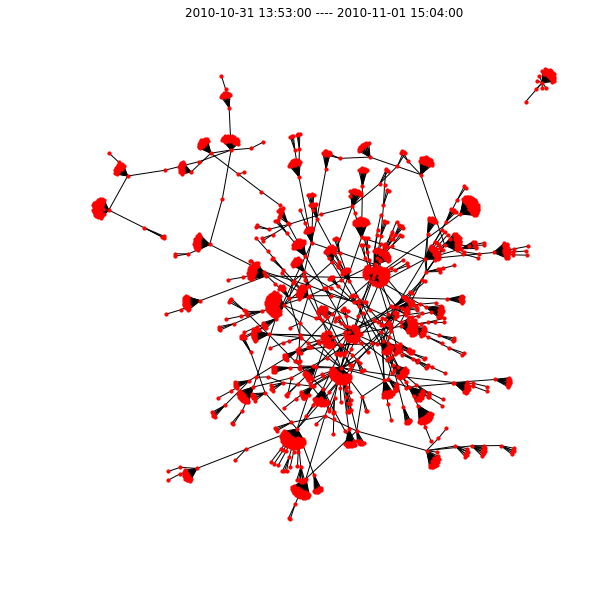

Number of nodes in graph: 1948
Diameter: 18
Radius: 9


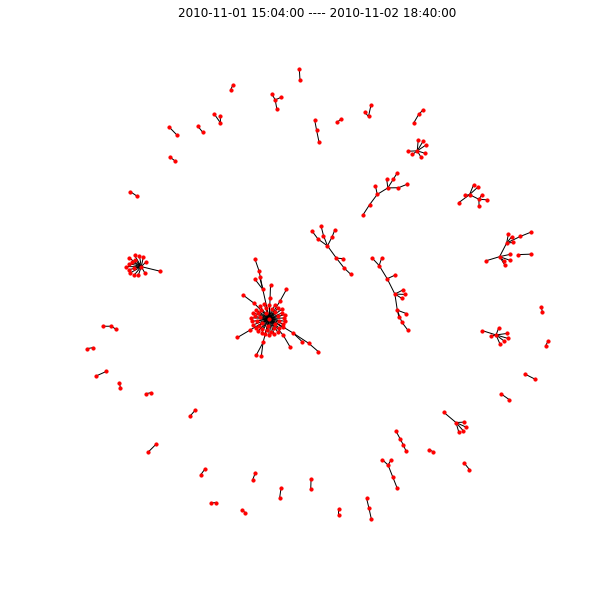

Number of nodes in graph: 247
Diameter: 4
Radius: 2


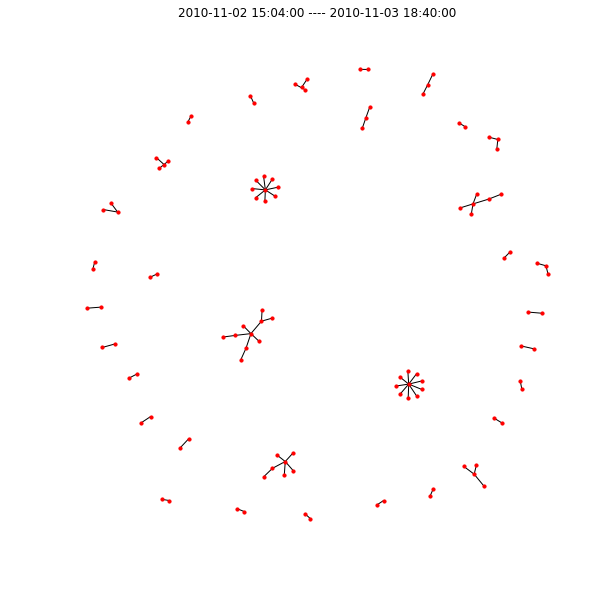

Number of nodes in graph: 111
Diameter: 2
Radius: 1


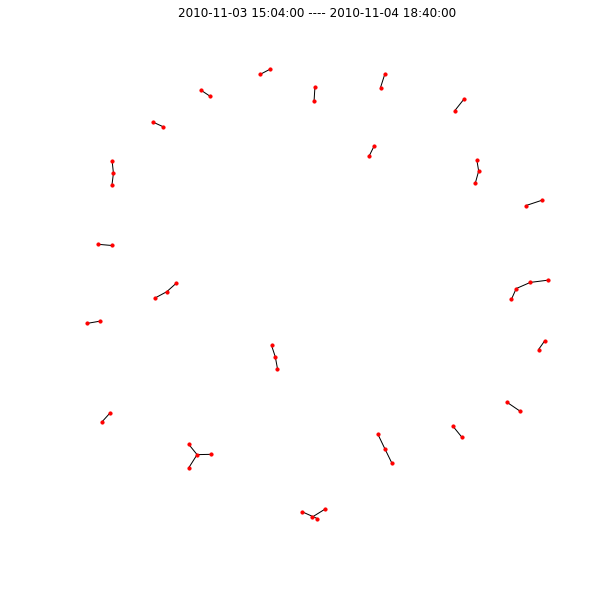

Number of nodes in graph: 55
Diameter: 2
Radius: 1


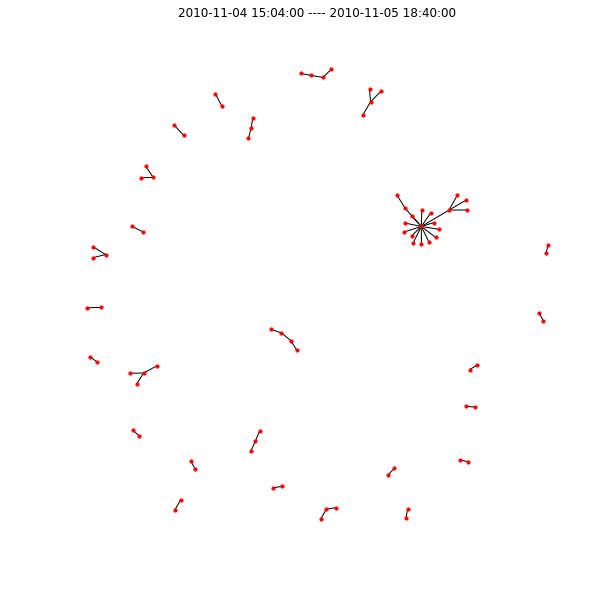

Number of nodes in graph: 82
Diameter: 4
Radius: 2


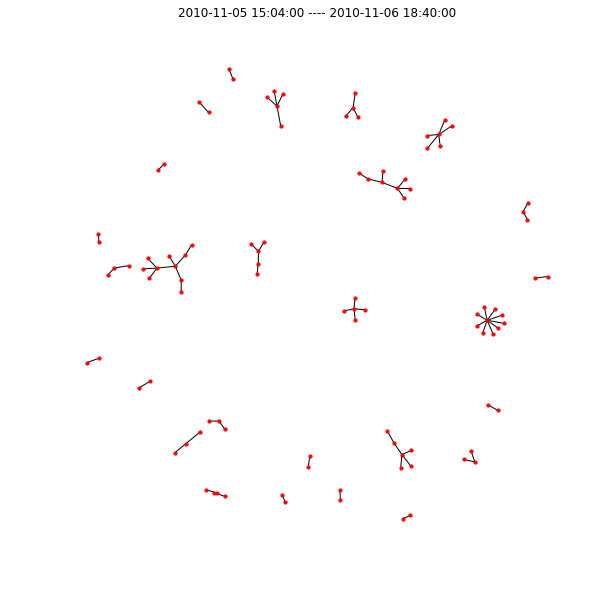

Number of nodes in graph: 102
Diameter: 4
Radius: 2


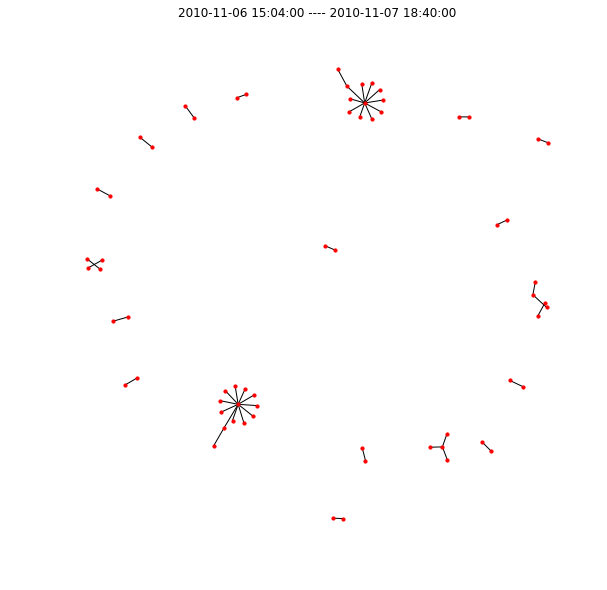

Number of nodes in graph: 66
Diameter: 3
Radius: 2


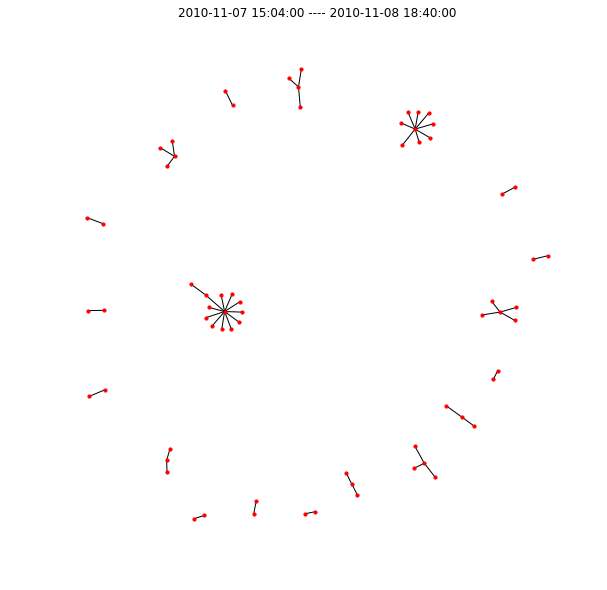

Number of nodes in graph: 68
Diameter: 3
Radius: 2


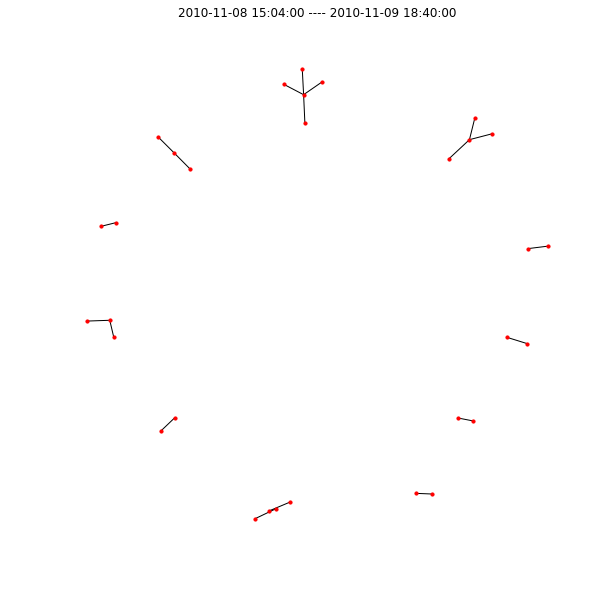

Number of nodes in graph: 31
Diameter: 2
Radius: 1


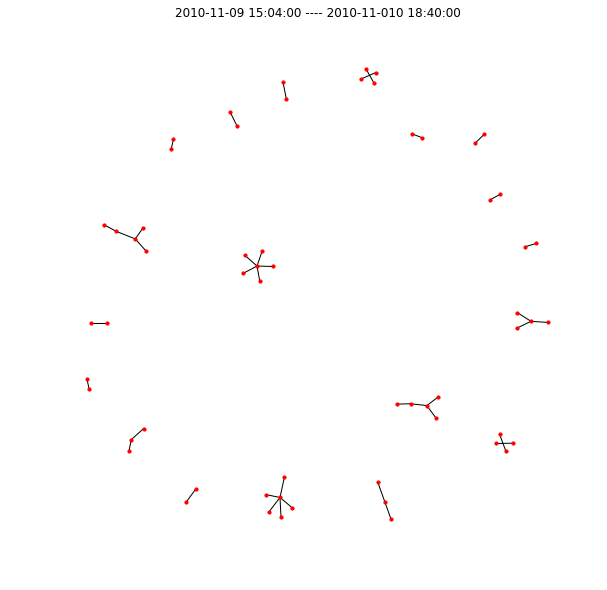

Number of nodes in graph: 60
Diameter: 2
Radius: 1


In [16]:
S=[]
d=[]
r=[]
for i in range(10):
    V= G1.subgraph(X[i])
    deg=nx.degree(V)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(10,10)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    #nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=10,node_color='r')
    if(i==0):
        plt.title('2010-10-31 13:53:00 ---- 2010-11-01 15:04:00')
    else:
        plt.title('2010-11-0'+str(i)+' 15:04:00 ---- 2010-11-0'+str(i+1)+' 18:40:00')
    plt.axis('off')
    plt.show()
    S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
    print("Number of nodes in graph: %d" %V.order())
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])

In [17]:
Y=[]
for node in X[0]:
    d = X[0].out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:20]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers most active in campaign 2 (first day): ")
print(L)

[[18490, 84], [18201, 72], [17900, 71], [17884, 66], [18026, 53], [18900, 41], [17897, 40], [18323, 39], [18056, 34], [17887, 32], [17954, 32], [17880, 31], [18702, 30], [19001, 30], [18039, 29], [18335, 28], [17883, 27], [18125, 27], [18860, 26], [18948, 26]]

Users most active in campaign 2 (first day): 
[18490, 18201, 17900, 17884, 18026, 18900, 17897, 18323, 18056, 17887, 17954, 17880, 18702, 19001, 18039, 18335, 17883, 18125, 18860, 18948]


In [18]:
D=[]
L.append(17879)
for i in L:
    for j in L:
        if(i!=j):
            if(i not in D):
                D.append(i)
            if(j not in D):
                D.append(j)
            if(nx.has_path(X[0],i,j)==True):
                for k in nx.shortest_path(X[0],i,j):
                    if(k not in D):
                        D.append(k)
            else:
                continue            
print(len(D))
print(D)

34
[18490, 18201, 17900, 17884, 18026, 18900, 17897, 18323, 18056, 17887, 17954, 17880, 18702, 19001, 18039, 18335, 17883, 18125, 18860, 18948, 17879, 18019, 18051, 18102, 17995, 17885, 17889, 17977, 18521, 18652, 18727, 18861, 18864, 17882]


In [19]:
V2= G1.subgraph(D)

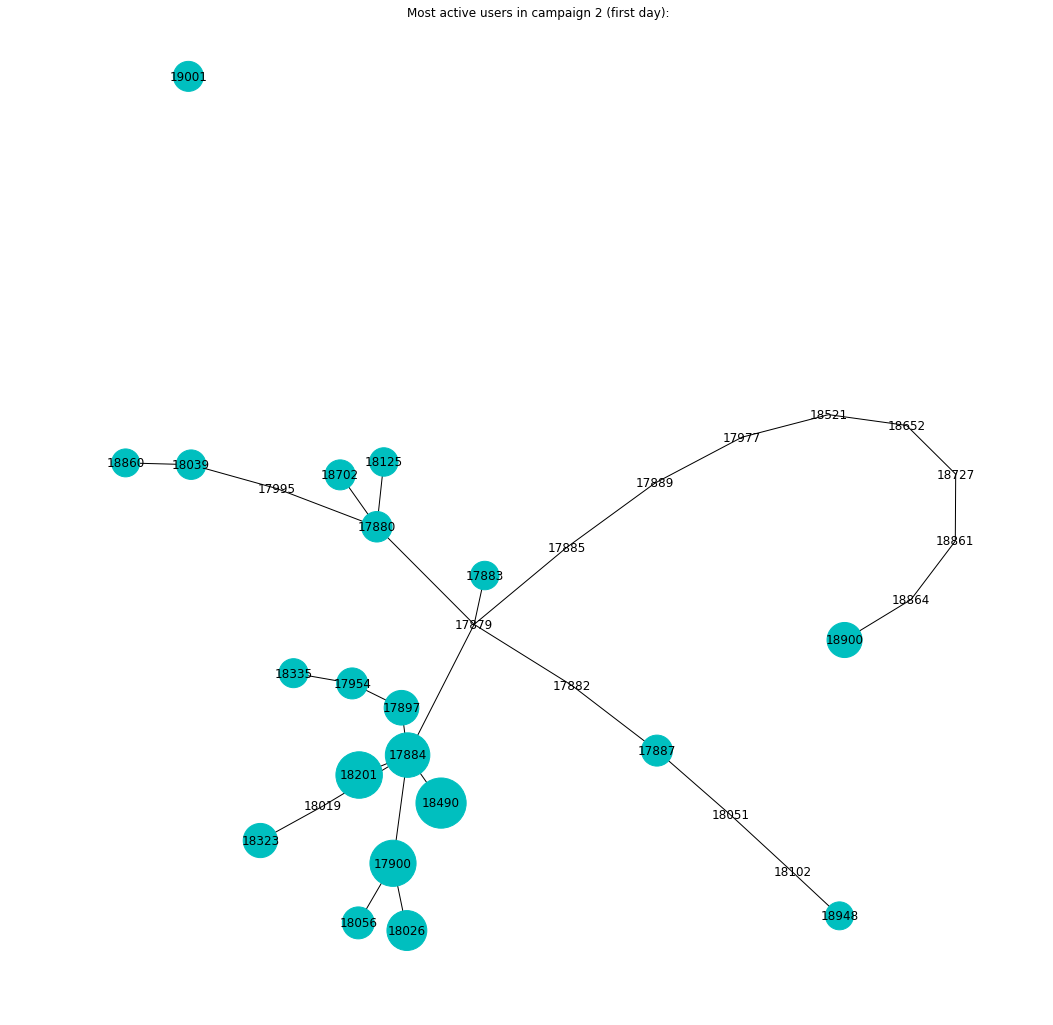

In [20]:
pos = nx.spring_layout(V2)
plt.figure(1,figsize=(18,18))     
nx.draw_networkx_edges(V2,pos, edge_color='k',arrows=True)
nx.draw_networkx_nodes(V2, pos,nodelist=[p[0] for p in Y],node_size=[v * 30 for v in [p[1] for p in Y]],node_color='c')
nx.draw_networkx_labels(V2,pos,with_labels=True)
plt.axis('off')
plt.title("Most active users in campaign 2 (first day): ")
plt.show()

In [21]:
s1 = pd.Series(pd.date_range('2010-10-31 13:53:00','2010-11-01 13:53:00',freq='2H'))

In [22]:
y[1]=y[1].as_matrix()
y[1]= pd.to_datetime(y[1])

In [23]:
s1=s1.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [24]:
Time2=[]
for i in range(12):
    Time2.append(y.loc[(y[1]>=s1[i])&(y[1]<s1[i+1])])
X2=[]
for i in range(12):
    X2.append(nx.from_pandas_dataframe(Time2[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 
for i in range(12):
    print(X2[i].order(),X2[i].size())

761 785
416 376
406 356
217 177
100 87
4 2
0 0
0 0
10 6
75 59
89 66
61 43


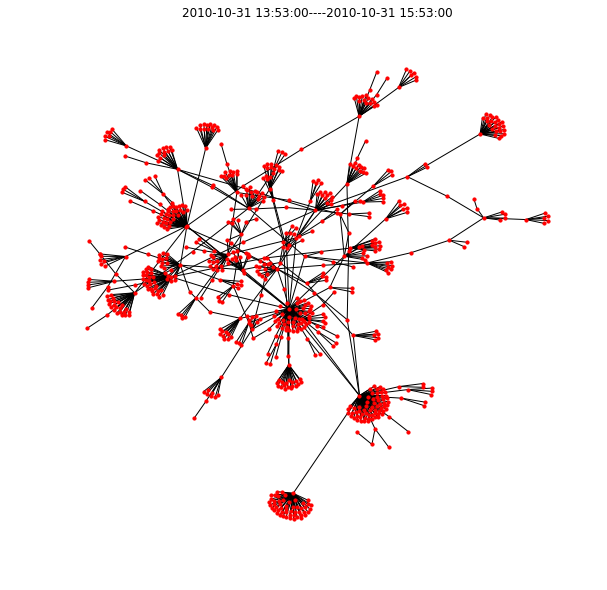

Number of nodes in graph: 761
Diameter: 13
Radius: 7


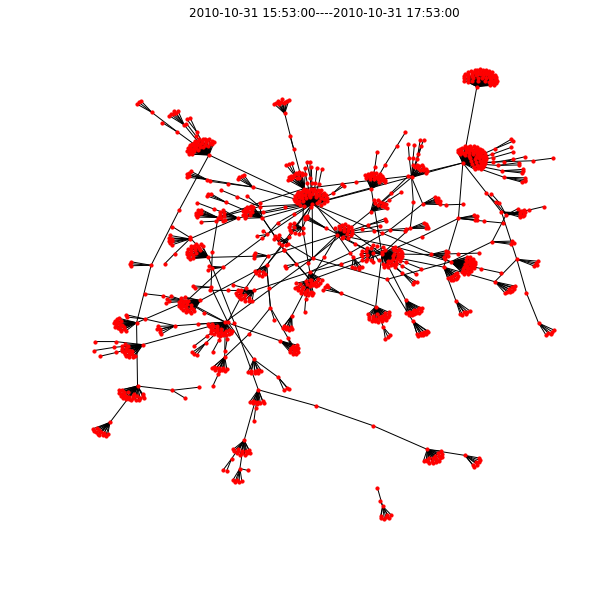

Number of nodes in graph: 1137
Diameter: 17
Radius: 9


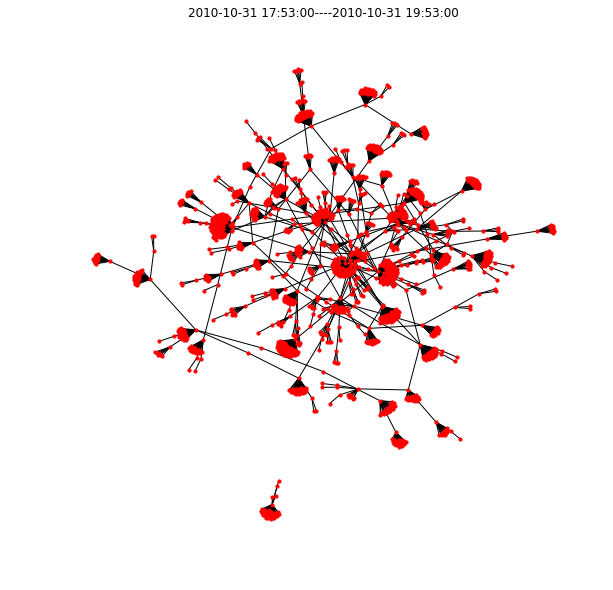

Number of nodes in graph: 1489
Diameter: 17
Radius: 9


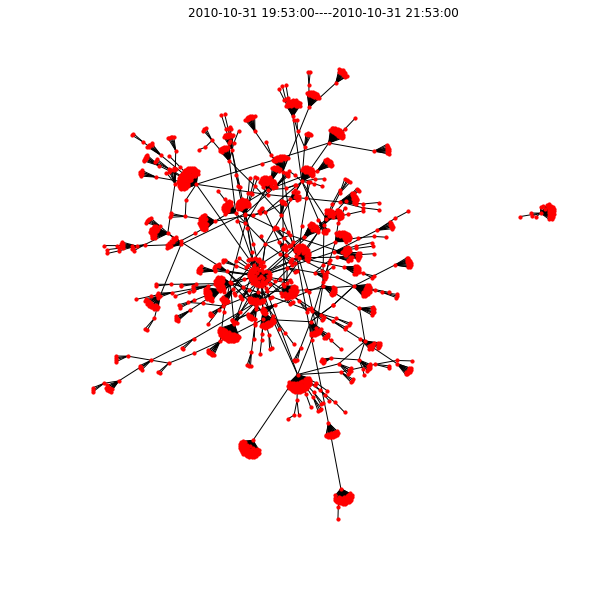

Number of nodes in graph: 1666
Diameter: 18
Radius: 9


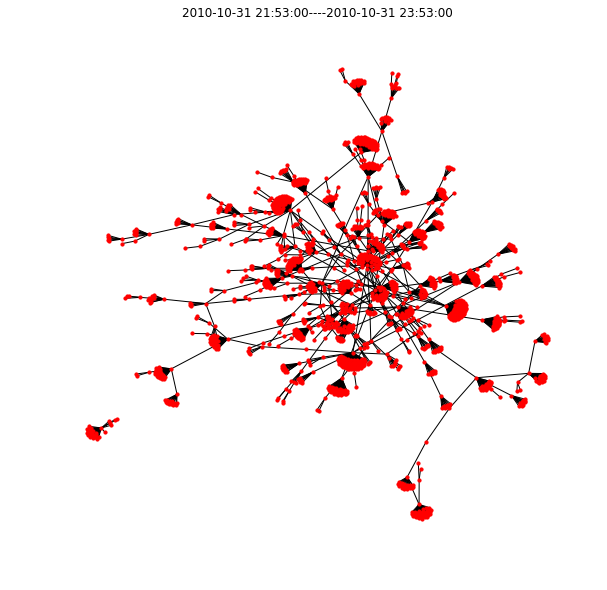

Number of nodes in graph: 1753
Diameter: 18
Radius: 9


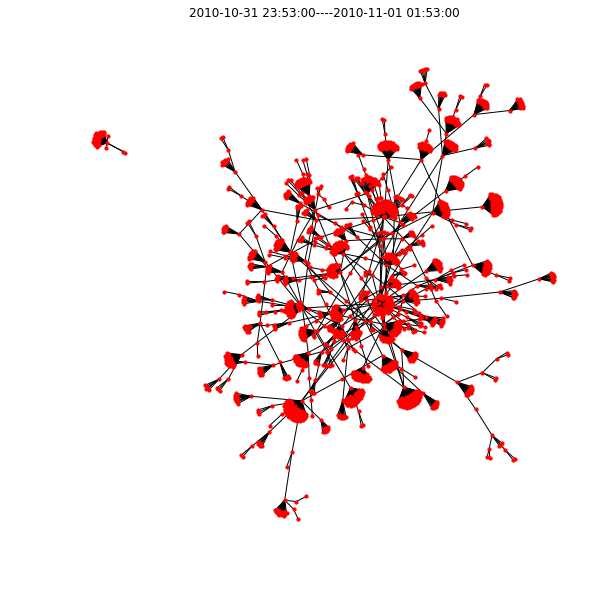

Number of nodes in graph: 1755
Diameter: 18
Radius: 9


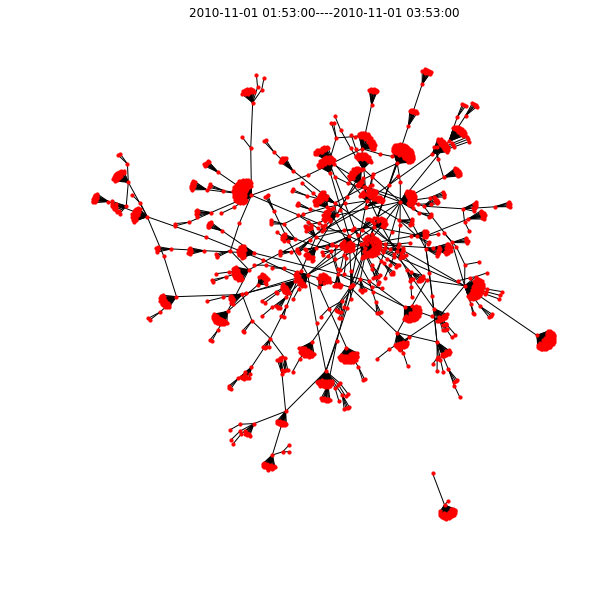

Number of nodes in graph: 1755
Diameter: 18
Radius: 9


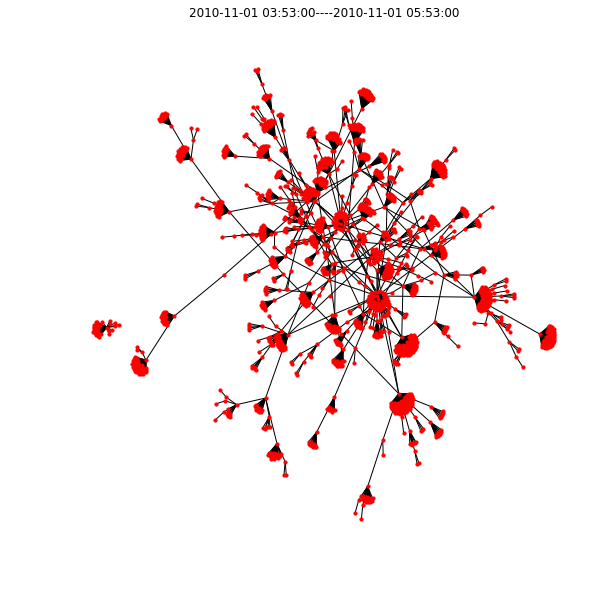

Number of nodes in graph: 1755
Diameter: 18
Radius: 9


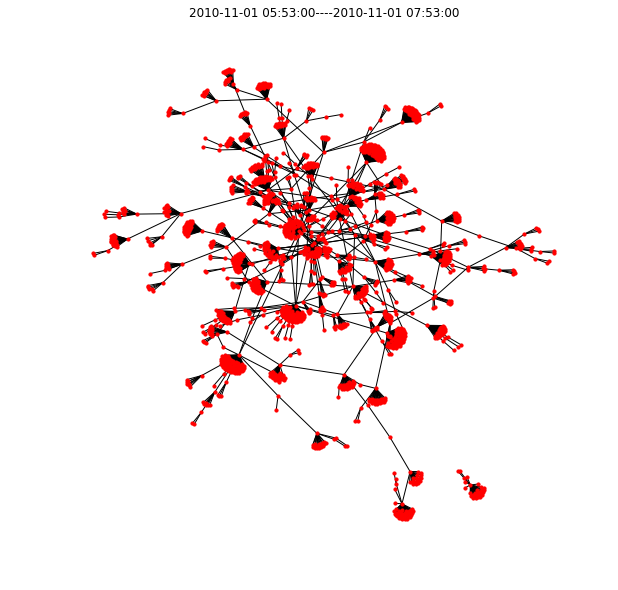

Number of nodes in graph: 1761
Diameter: 18
Radius: 9


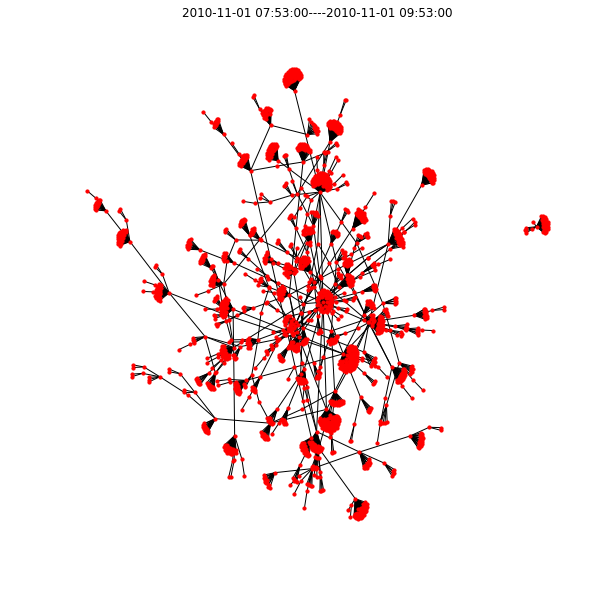

Number of nodes in graph: 1820
Diameter: 18
Radius: 9


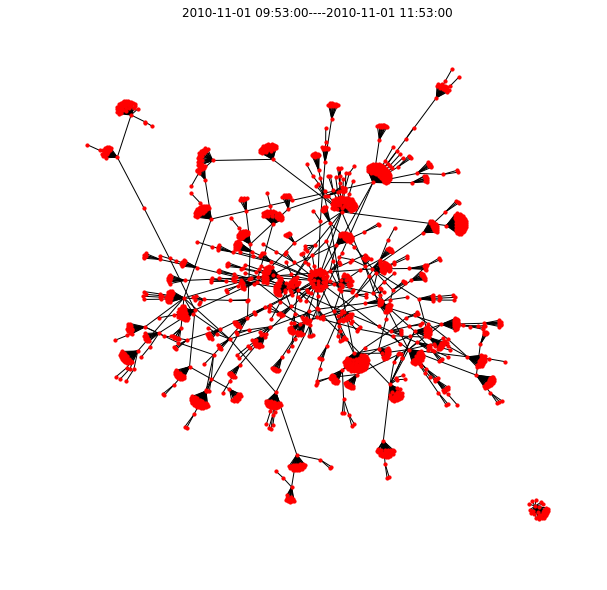

Number of nodes in graph: 1885
Diameter: 18
Radius: 9


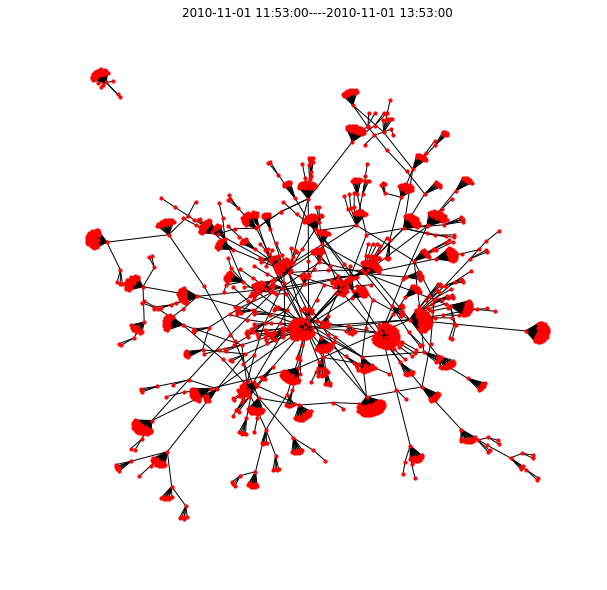

Number of nodes in graph: 1928
Diameter: 18
Radius: 9


In [25]:
S=[]
d=[]
r=[]
for i in range(12):
    P=nx.Graph()
    for j in range(i+1):
        P=nx.compose(P,X2[j])
    V= G1.subgraph(P)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(10,10)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    #nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=10,node_color='r')
    plt.title(s1[i]+'----'+s1[i+1])
    plt.axis('off')
    plt.savefig('c2'+str(i+1)+'.png')
    plt.show()
    S.append(max(nx.connected_component_subgraphs(V),key=len))
    print("Number of nodes in graph: %d" %V.order())
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])